In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\USER\Videos\Data Analysis Portfolio\Repeat Order\final_table.csv')

<Figure size 800x500 with 0 Axes>

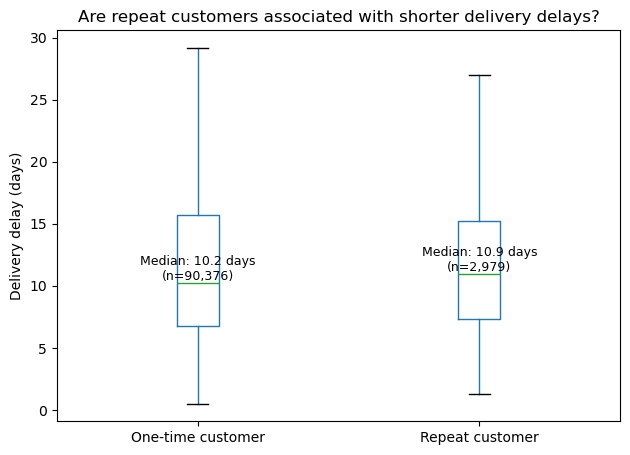

In [4]:
# Categorical mapping
df["customer_type"] = df["is_repeat_customer"].map({
    0: "One-time customer",
    1: "Repeat customer"
})

# Summary for annotation
summary_delay = (
    df.groupby("customer_type")["avg_delivery_day"]
      .agg(["count", "median"])
      .reset_index()
)

plt.figure(figsize=(8, 5))
df.boxplot(
    column="avg_delivery_day",
    by="customer_type",
    grid=False,
    showfliers=False
)

for i, row in summary_delay.iterrows():
    plt.text(
        i + 1,
        row["median"],
        f"Median: {row['median']:.1f} days\n(n={row['count']:,})",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.title("Are repeat customers associated with shorter delivery delays?")
plt.suptitle("")
plt.ylabel("Delivery delay (days)")
plt.xlabel("")
plt.tight_layout()
plt.show()


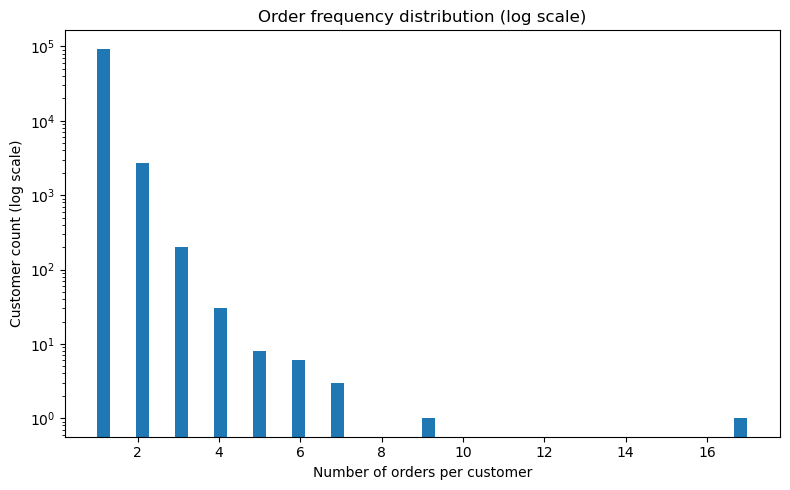

In [8]:
plt.figure(figsize=(8, 5))

df["total_orders"].plot(
    kind="hist",
    bins=50,
    logy=True
)

plt.title("Order frequency distribution (log scale)")
plt.xlabel("Number of orders per customer")
plt.ylabel("Customer count (log scale)")
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

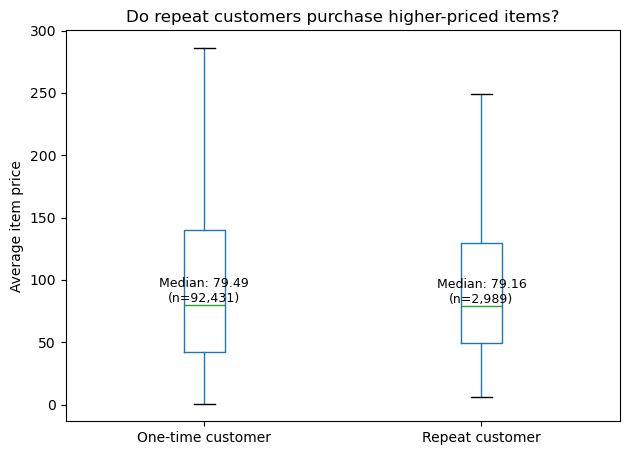

In [6]:
# 1. Explicit categorical mapping (data hygiene)
df["customer_type"] = df["is_repeat_customer"].map({
    0: "One-time customer",
    1: "Repeat customer"
})

# 2. Compute group sizes and medians (for annotation)
summary = (
    df.groupby("customer_type")["avg_item_price_customer"]
      .agg(["count", "median"])
      .reset_index()
)

# 3. Plot
plt.figure(figsize=(8, 5))
df.boxplot(
    column="avg_item_price_customer",
    by="customer_type",
    grid=False,
    showfliers=False  # reduce distortion from extreme outliers
)

# 4. Annotate sample sizes and medians
for i, row in summary.iterrows():
    plt.text(
        i + 1,
        row["median"],
        f"Median: {row['median']:.2f}\n(n={row['count']:,})",
        ha="center",
        va="bottom",
        fontsize=9
    )

# 5. Titles and labels framed as a question
plt.title("Do repeat customers purchase higher-priced items?")
plt.suptitle("")  # remove pandas default
plt.xlabel("")
plt.ylabel("Average item price")

plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Select variables
cols = [
    "avg_delivery_day",
    "pct_delay",
    "avg_review",
    "avg_item_price_customer"
]

X = df[cols]
y = df["is_repeat_customer"]

# Drop rows with missing values
mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)

# Results
results = pd.DataFrame({
    "feature": cols,
    "coef": model.coef_[0]
}).sort_values("coef", ascending=False)

results


,feature,coef
0,avg_delivery_day,-0.003144
2,avg_review,-0.038242
1,pct_delay,-0.045573
3,avg_item_price_customer,-0.117218
